Homework_3 Matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt')
print(data)
years = data[:,0]
hares = data[:,1]
lynxes = data[:,2]
carrots = data[:,3]

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]


1. Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

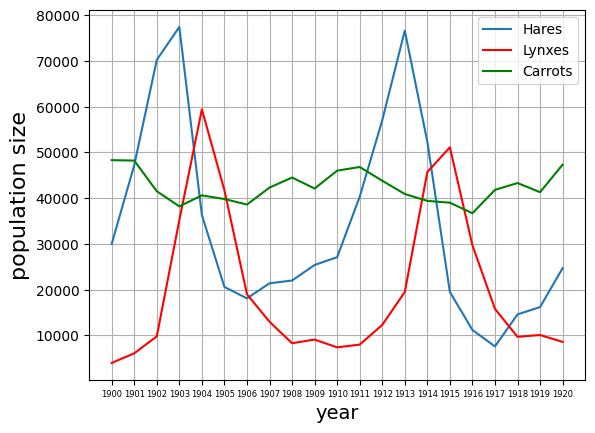

In [4]:
plt.plot(years, hares, label='Hares')
plt.plot(years, lynxes, label='Lynxes', c='red')
plt.plot(years, carrots, label='Carrots', c='green')
plt.xlabel('year', fontsize=14)
plt.ylabel('population size', fontsize=16)
plt.xticks(years, fontsize=6 )
plt.grid()
plt.legend()
plt.show()

2. Find which year each species had the largest population. Mark these years in the plot of populations.

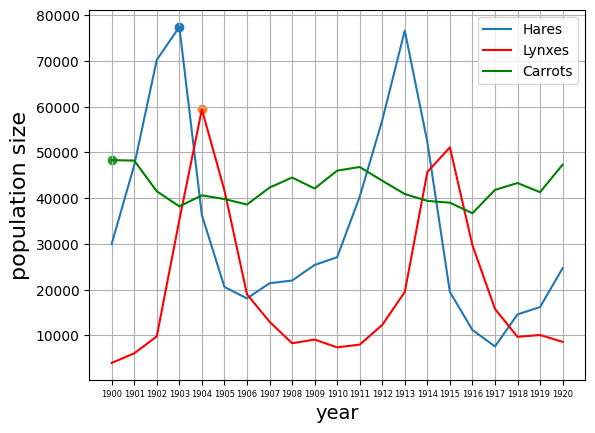

In [5]:
plt.scatter(years[np.argmax(hares)], np.max(hares))
plt.scatter(years[np.argmax(lynxes)], np.max(lynxes))
plt.scatter(years[np.argmax(carrots)], np.max(carrots))
plt.plot(years, hares, label='Hares')
plt.plot(years, lynxes, label='Lynxes', c='red')
plt.plot(years, carrots, label='Carrots', c='green')
plt.xlabel('year', fontsize=14)
plt.ylabel('population size', fontsize=16)
plt.xticks(years, fontsize=6 )
plt.grid()
plt.legend()
plt.show()

3. Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

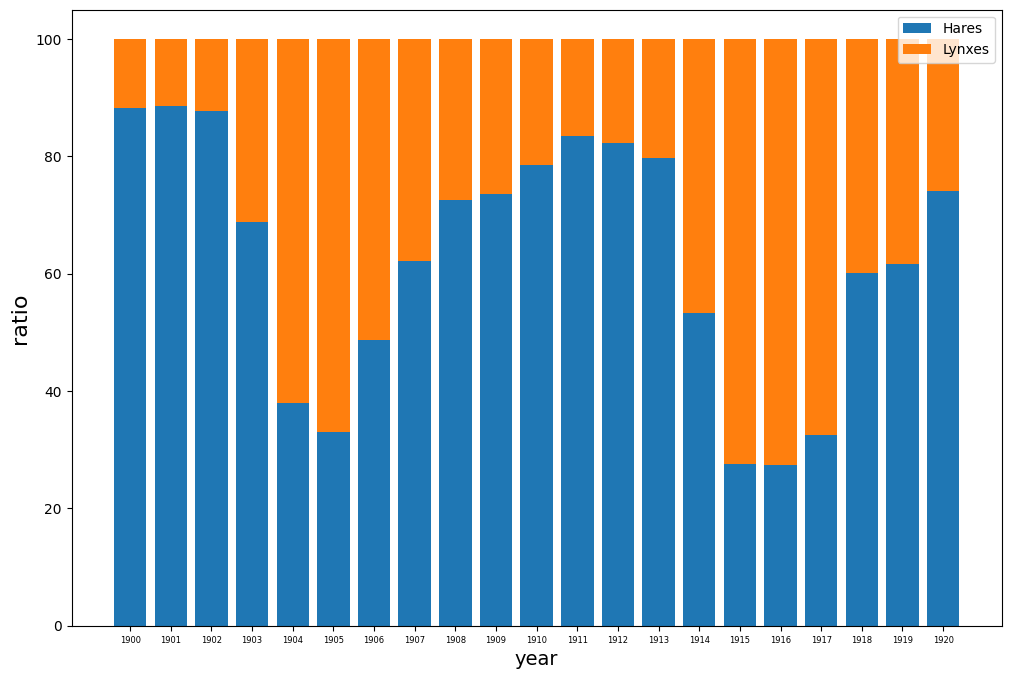

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(years, hares / (hares + lynxes) * 100,  label = 'Hares')
ax.bar(years, lynxes / (hares + lynxes) * 100, bottom = hares / (hares + lynxes)*100, label='Lynxes')
ax.set_ylabel('ratio', fontsize=16)
ax.set_xlabel('year', fontsize=14)
ax.legend()
plt.xticks(years, fontsize=6 )
plt.show()

4. Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

Hares mean: 34080.95238095238; Hares std: 20897.906458089667
Lynxes mean: 20166.666666666668; Lynxes std: 16254.591536908763
Carrots mean: 42400.0; Carrots std: 3322.5062255844787


<Figure size 1200x800 with 0 Axes>

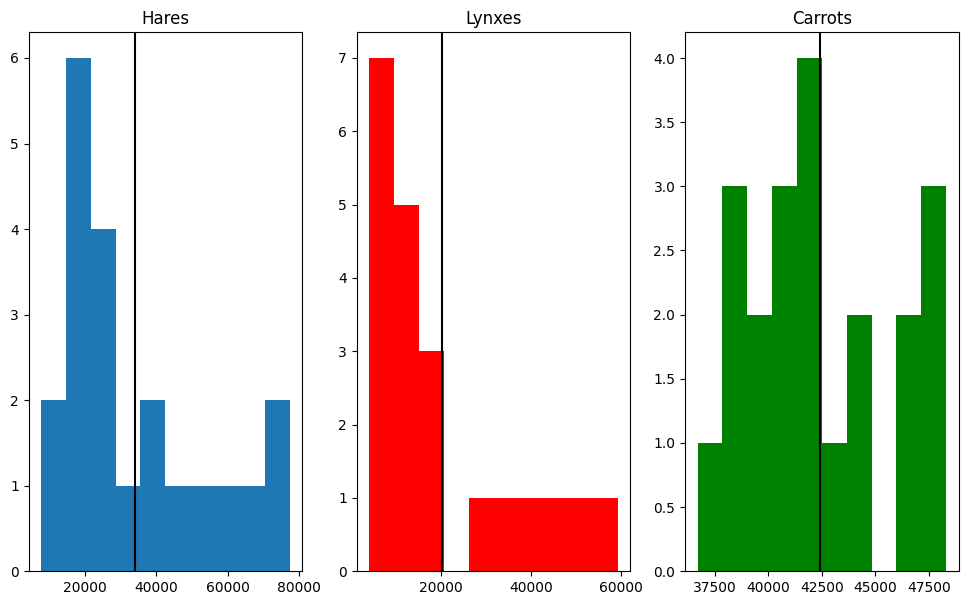

In [10]:
fig = plt.figure(figsize = (12, 8))
print(f"Hares mean: {np.mean(hares)}; Hares std: {np.std(hares)}")
print(f"Lynxes mean: {np.mean(lynxes)}; Lynxes std: {np.std(lynxes)}")
print(f"Carrots mean: {np.mean(carrots)}; Carrots std: {np.std(carrots)}")
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 7))
ax1.hist(hares)
ax1.set_title('Hares')
ax1.axvline(np.mean(hares), c = 'black')
ax2.hist(lynxes, color = 'red')
ax2.set_title('Lynxes')
ax2.axvline(np.mean(lynxes), c = 'black')
ax3.hist(carrots, color = 'green')
ax3.set_title('Carrots')
ax3.axvline(np.mean(carrots), c = 'black')
plt.show()

5. Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.


['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


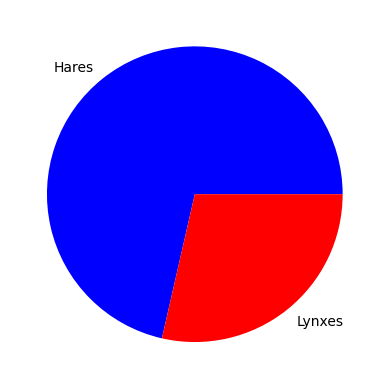

In [11]:
def f(num):
    if num:
        return 'L'
    return 'H'


max = np.argmax(data[:, 1:3], axis = 1)
f =  np.vectorize(f)
max = f(max)
print(max)
plt.pie([np.count_nonzero(max == "H"), np.count_nonzero(max == "L")], labels=['Hares', 'Lynxes'], colors=["blue", "red"]);

6.Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

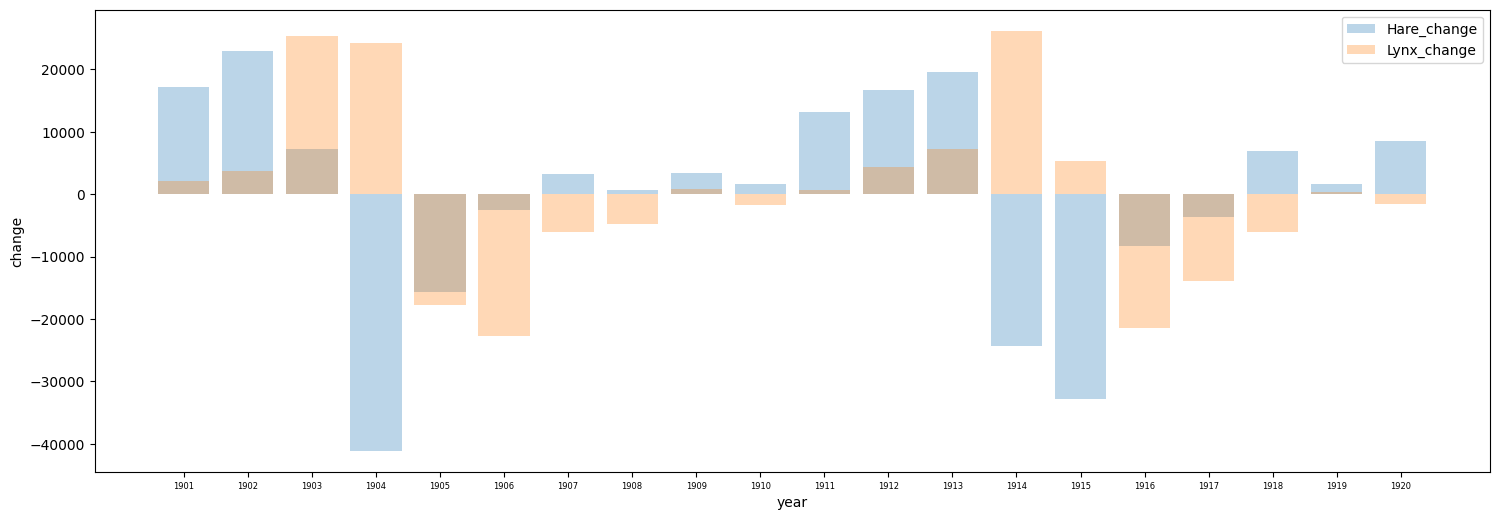

correlation coefficient =  -0.1780136594118296


In [13]:
hare_change = np.array([hares[1: ] - hares[:-1]])
lynx_change = np.array([lynxes[1:] - lynxes[:-1]])
fig = plt.figure(figsize = (18, 6))
ax = plt.subplot()
ax.bar(years[1:], hare_change[0], alpha=0.3, label = 'Hare_change');
ax.bar(years[1:], lynx_change[0], alpha=0.3,label = 'Lynx_change');
ax.set_ylabel('change')
ax.set_xlabel('year')
ax.legend()
plt.xticks(years[1:], fontsize=6 )
plt.show()

print('correlation coefficient = ', np.corrcoef(hare_change, lynx_change)[0, 1])

7. Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

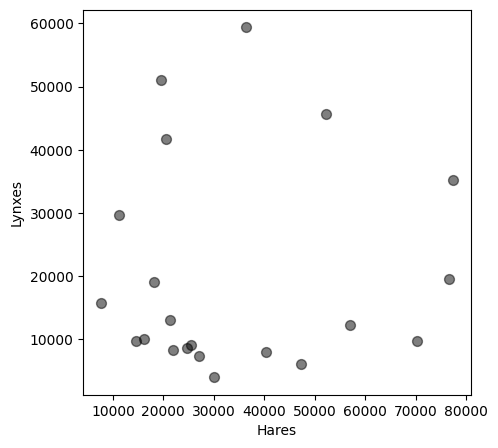

In [14]:
fig, (ax2) = plt.subplots(figsize=(5, 5))
ax2.scatter(hares, lynxes, s = 50, marker='o', alpha=0.5, color='black')
ax2.set(xlabel='Hares', ylabel='Lynxes')
plt.show()

8. Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value with the true value and print a ratio of the error to the true value.

In [15]:
pred = np.sum(hares[:-1]) / len(hares[: -1])
print(pred / hares[-1])

1.3987854251012146
